$$ $$
  
<a id="contents"></a>

<center style ="font-size: xx-large; font-weight: 600; line-height: 1.1;padding: 10px">
Sea turtle face detection through distributed machine learning 
</center>  
<center>
Group 6:Daniel Jordan, Jake Jackson, Alessandro Maria Capodaglio and Marco Lorenzetti
</center>
 
### Abstract:
<div style="text-align: justify; padding: 20px"> 
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque volutpat est quam, eu faucibus urna pulvinar fermentum. Nunc sodales orci at massa mollis, sit amet suscipit turpis porttitor. Vestibulum bibendum purus eget dictum mattis. Nam pulvinar, turpis non porttitor rutrum, magna ex feugiat enim, a malesuada nibh elit sit amet turpis. Sed eget lorem et magna viverra cursus. Morbi auctor, tortor eu sodales mollis, arcu velit sodales odio, vel pulvinar turpis neque ac ligula. Proin tempor non augue in imperdiet.
</div>

#### Key words: Dask, Sklearn,  Machine Learning, Distributed computing
----

<a id="contents"></a>


## Contents 

* [Section 1: Cloud Veneto Setup](#cloud_v)   
* [Section 2: Dask Sklearn Integration](#sklearn)
  * [Install packages on all machines via dask](#install)   
  * [Image preprocessing via dask](#pre)
  * [sklearn : SGD](#sgd)
  * [sklearn dask integration: Grid search](#grid)
  * [sklearn dask integration: SVC](#svc)
* Section 3: will append the notebooks
* Section 4 :^^

----

# Section 1: Cloud Veneto setup 

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Praesent in euismod massa, at lobortis arcu. Vestibulum interdum velit lorem, sed vestibulum erat placerat sed. In lorem est, maximus eleifend ipsum non, lobortis fringilla odio. Vestibulum eget lorem nisi. Vivamus ac accumsan mi, pretium ullamcorper ante. Nunc pellentesque id mauris eget imperdiet. Nullam et nibh eu lectus consequat porta. Proin vitae augue ut metus sodales tincidunt. Sed dignissim nulla non lectus hendrerit, quis euismod libero vestibulum. Maecenas at nisl accumsan, accumsan dui a, vehicula nibh. Phasellus bibendum tellus nec dolor dapibus, at malesuada odio mollis. Donec hendrerit lectus sed odio suscipit, in scelerisque justo tempor. Donec commodo non lectus vel pharetra.

Sed vehicula tortor at tellus varius, nec sodales quam dictum. Morbi euismod ante sit amet lorem consectetur, vitae malesuada eros aliquam. Praesent sed ligula vestibulum, consectetur nibh nec, mollis erat. Etiam bibendum tincidunt ligula, in ultricies nisl blandit eget. Ut tortor velit, pharetra id accumsan id, scelerisque sit amet nibh. Aliquam eget diam maximus, imperdiet lorem eget, pharetra urna. Vivamus commodo quam purus, nec molestie nisi scelerisque et.

Curabitur suscipit suscipit eros ac interdum. Morbi aliquam congue leo eu lobortis. Duis ac turpis fermentum, hendrerit nisi ac, volutpat risus. In quam libero, maximus lacinia sollicitudin non, scelerisque sit amet justo. Donec ut nisi vitae nunc feugiat lacinia. Suspendisse eu neque ullamcorper, tempus elit luctus, commodo elit. Nullam eget mattis erat. Cras metus felis, sodales ut nibh sed, dapibus maximus purus.

# Section 2: Dask Sklearn integration

In [1]:
from dask.distributed import Client
import os

client = Client('dask-scheduler:8786')
client.restart()

<Client: 'tcp://172.25.0.2:8786' processes=6 threads=6, memory=12.85 GiB>

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="install"></a> 


## Install skimage and dask image

In [2]:
import os ##misses out the scheduler

def skimage_install():
    out=os.system('conda install -c anaconda scikit-image -y')
    return out

def daskimage_install():
    out=os.system('conda install -c conda-forge dask-image -y')
    return out

daskimage_install()
client.run(daskimage_install)

skimage_install()
client.run(skimage_install)

Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - scikit-image


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blosc-1.21.0               |       h8c45485_0          64 KB
    brunsli-0.1                |       h2531618_0         199 KB  anaconda
    ca-certificates-2022.4.26  |       h06a4308_0         132 KB  anaconda
    certifi-2022.6.15          |   py39h06a4308_0         156 KB  anaconda
    cfitsio-3.470              |       hf0d0db6_6         1.3 MB  anaconda
    charls-2.2.0               |       h2531618_0         129 KB  anaconda
    conda-4.13.0               |   py39h06a4308_0         995 KB  anaconda
    imagecodecs-2021.8.26      |   py39h4cda21f_0         7.0 MB  anaconda
    imageio-2.9.0              |     pyhd3eb1b0_0         3.1 MB  anaconda
    jxrlib-1.1                 |       h7b6447c_2         238 KB  anaconda
    lerc-3.0 

{'tcp://172.20.0.4:46451': 0,
 'tcp://172.20.0.5:36133': 0,
 'tcp://172.20.0.6:41289': 0,
 'tcp://172.20.0.7:40217': 0,
 'tcp://172.20.0.8:38173': 0,
 'tcp://172.20.0.9:36979': 0}

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="pre"></a> 

### Load all of the images into a single dask array 

In [17]:
import numpy as np
import dask_image
import dask.array as da
import dask.dataframe as dd
import dask.delayed
from dask.array.image import imread
filename_pattern = os.path.join('temp-tiles', 'image-*.png')

def load_turtles(path, kind='train'):
    f  = os.path.join(path, 'all/*.jpg')
#     nf = os.path.join(path, 'noface/noface*.jpg')
#     all_files = os.path.join(path, '*.jpg')
    #load all images
    #images = da.concatenate([imread(f), imread(nf)])
    images = dask_image.imread.imread(f)
    images=images.rechunk((40, 198, 198, 3))
    ##create numpy list of ,matching labels
    face_lb = np.ones(len(os.listdir(os.path.join(path, 'face')))) #fetch the 
    no_face_lb= np.negative(np.ones(len(os.listdir(os.path.join(path, 'noface')))))
    labels = np.append(face_lb, no_face_lb)
    labels= da.from_array(labels)
    return images, labels 

data_path = '/opt/workspace/data/'
X, y = load_turtles(data_path)
X.persist()
X[1].compute()

KilledWorker: ("('_map_read_frame-ff0eb79235bc20d71940961faafeeaf2', 5, 0, 0, 0)", <WorkerState 'tcp://172.25.0.8:37975', status: closed, memory: 0, processing: 779>)

In [38]:
permutation = da.random.permutation(len(X))
X = X[permutation]
y = y[permutation]

# X.persist()
# y.persist()
X

dask.array<slice_with_int_dask_array_aggregate, shape=(4000, 198, 198, 3), dtype=uint8, chunksize=(4000, 198, 198, 3), chunktype=numpy.ndarray>

## What does the data look like?
Note this is better done before the data is distributed

In [27]:
def plot_input(X_i, y, i):
    lb = ', No Face; label =-1'
    if y==1:
        lb=', Face: label = 1'
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    ax.imshow(X_i)
    ax.set_title('Turtle '+ str(i)+lb)
    fig.show()

plot_input(X[100].compute(),y[100].compute(), 100)

KilledWorker: ("('array-3bf89e816b5c076a8f96fc007a983aa0', 3780)", <WorkerState 'tcp://172.24.0.5:38493', status: closed, memory: 0, processing: 1467>)

## Dask preprocessing
Sklearn will only allow the use of 2D arrays, therefore the turtle image data needs to be converted into a 2D array from the colour RGB array. To do this the image is converted to greyscale and the hog features are applied.

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
from skimage.feature import hog
import skimage

class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:

            return np.array([local_hog(img) for img in X])

### Example

In [13]:
def plot_all_preprocessing(X_i, y_i, i): 
    #from skimage.feature import hog
    lb = ', No Face; label =-1'
    if y_i==1:
        lb=', Face: label = 1'
    turtle = X_i
    turtle_grey =  RGB2GrayTransformer().fit_transform(turtle)
    turtle_hog, turtle_hog_img = hog(
        turtle_grey, pixels_per_cell=(14,14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        visualize=True, 
        block_norm='L2-Hys')

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle('Turtle '+ str(i) +lb , fontsize=16)

    #[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) for a in ax]

    ax[0].imshow(turtle)
    ax[0].set_title('Turtle')
    ax[1].imshow(turtle_grey, cmap='gray')
    ax[1].set_title('Turtle')
    ax[1].imshow(turtle_grey, cmap='gray')
    ax[1].set_title('Turtle Grey')
    ax[2].imshow(turtle_hog_img)
    ax[2].set_title('Turtle hog')
    plt.show()

plot_all_preprocessing(X[500].compute(), y[500].compute(), 500)

KilledWorker: ("('imread-concatenate-concatenate-17e84bd98c55af2e6ad54f002552ac40', 557, 0, 0, 0)", <WorkerState 'tcp://172.24.0.7:34353', status: closed, memory: 0, processing: 2003>)

### Bulk Preprocessing all images with Dask Delayed

In [21]:
@dask.delayed
def SGD_preprocessing_d(X):
    # create an instance of each transformer
    grayify = RGB2GrayTransformer()
    hogify = HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2,2), 
        orientations=9, 
        block_norm='L2-Hys'
    )
    scalify = StandardScaler()
    # call fit_transform on each transform converting X_train step by step
    X_gray = grayify.fit_transform(X)
    X_hog = hogify.fit_transform(X_gray)
    X_prepared = scalify.fit_transform(X_hog)
    #return np.shape(X_prepared)
    return X_prepared

chunk_size = 500
y= y.rechunk(chunks= (chunk_size))
X_prep = X.rechunk(chunks= (chunk_size, 198,198, 3)).to_delayed().ravel()
X_prep=da.concatenate([da.from_delayed(SGD_preprocessing_d(i), (chunk_size, 6084), dtype=np.float64) for i in X_prep])

### Split training and testing

In [22]:
from IPython.display import display

m_train = int(len(X_prep)*0.6) 
m_test = len(X_prep) - m_train

##only using for unprocessed turtle plot: wouldnt keep this for serious applications
X_train_raw, X_test_raw = X[:m_train], X[m_train:]

## Processed
X_train, X_test = X_prep[:m_train], X_prep[m_train:]
y_train, y_test = y[:m_train], y[m_train:]
print('m_training = ', m_train,'m_test =', m_test,'Total data =', m_train+m_test)

X_train = X_train.persist()
y_train = y_train.persist()
X_test = X_test.persist()
y_test = y_test.persist()

display(X_train, y_train)

m_training =  2400 m_test = 1600 Total data = 4000


dask.array<getitem, shape=(2400, 6084), dtype=float64, chunksize=(500, 6084), chunktype=numpy.ndarray>

dask.array<getitem, shape=(2400,), dtype=float64, chunksize=(500,), chunktype=numpy.ndarray>

In [23]:
X_train = X_train.compute()
y_train = y_train.compute()
X_test = X_test.compute()
y_test = y_test.compute()

KilledWorker: ("('imread-concatenate-concatenate-c2b22b7642068d6be479875ce79f1a3c', 3724, 0, 0, 0)", <WorkerState 'tcp://172.24.0.6:46497', status: closed, memory: 0, processing: 2000>)

## Dask Wrappers

In the case in which the data cnnot fit on one machine the processing needs to be distributed.

In [12]:
from dask_ml.wrappers import Incremental
from sklearn.neural_network import MLPRegressor, MLPClassifier


model = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation="relu",
    solver="adam",
    learning_rate="adaptive",
    max_iter=100,
    random_state=10,
    early_stopping=False,
    verbose=1
)

model = Incremental(model, scoring="accuracy")
model.fit(X_train, y_train, classes=[-1,1])

KilledWorker: ("('imread-concatenate-concatenate-17e84bd98c55af2e6ad54f002552ac40', 2352, 0, 0, 0)", <WorkerState 'tcp://172.24.0.7:34353', status: closed, memory: 0, processing: 2003>)

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="grid"></a> 

## Sklearn Joblib with  dask: GridSearch
In the case where you are fortunate to be able to fit all of the data on a single machine the joblib the .compute function can be used. The .compute method takes a collection and returns a single future. In order to use the joblib dask add-in for sklearn we computed the data to recive numpy arrays. This only works on estimators where you can specify n_jobs. 

In [131]:
from dask_ml.datasets import make_classification
from dask_ml.wrappers import Incremental
from sklearn.linear_model import SGDClassifier

X_train = X_train.rechunk(chunks= (400, 6084))
y_train = y_train.rechunk(chunks= (400))

##maybe rechunck the test
X_train = X_train.compute()
y_train = y_train.compute()
X_test = X_test.compute()
y_test = y_test.compute()

 ### Imports

In [ ]:
import numpy as np
from dask.distributed import Client
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

### Run

In [10]:
param_space = {
    'C': np.logspace(-6, 6, 13),
    'gamma': np.logspace(-8, 8, 17),
    'tol': np.logspace(-4, -1, 4),
    'class_weight': [None, 'balanced'],
}

model = SVC(kernel='rbf')
search = RandomizedSearchCV(model, param_space, cv=3, n_iter=50, verbose=10)

with joblib.parallel_backend('dask'):
    search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


### Results

In [11]:
search.best_score_

0.9883333333333333

In [12]:
search.best_params_

{'tol': 0.0001, 'gamma': 0.0001, 'class_weight': 'balanced', 'C': 100.0}

## Sklearn Joblib with  dask: Random forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, random_state=0)
with joblib.parallel_backend('dask'):
    clf.fit(X_train, y_train)
    
clf.score(X_test, y_test)

0.98875

In [143]:
X_train_raw = X_train_raw.compute()
X_test_raw = X_test_raw.compute()
y_test=y_test.compute()

dask.array<getitem, shape=(1600,), dtype=float64, chunksize=(1600,), chunktype=numpy.ndarray>

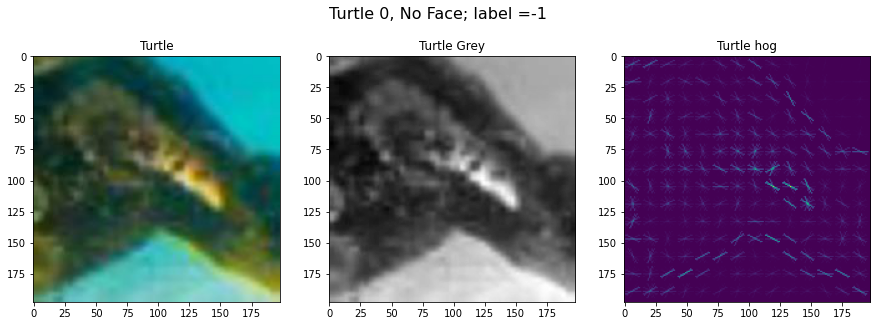

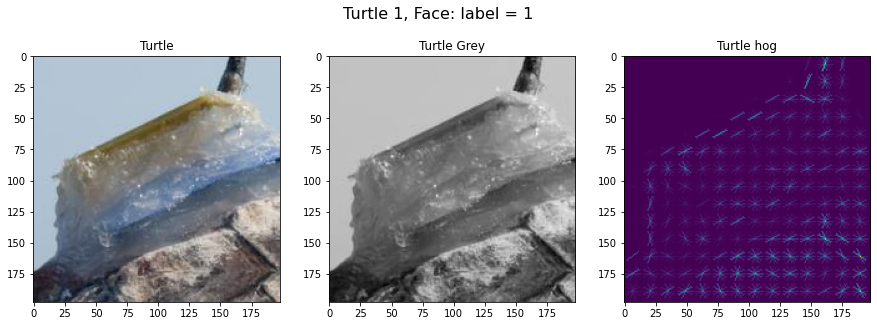

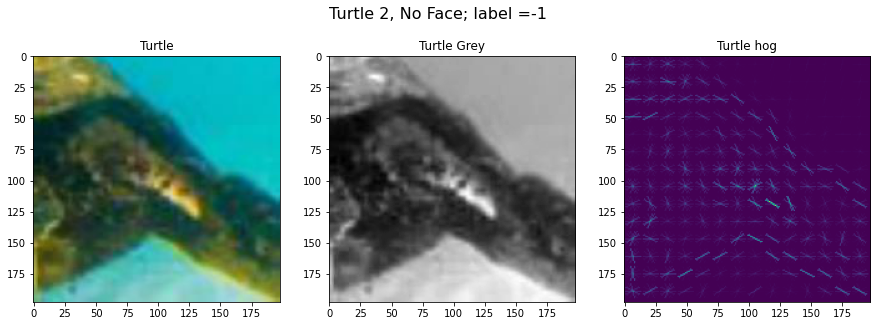

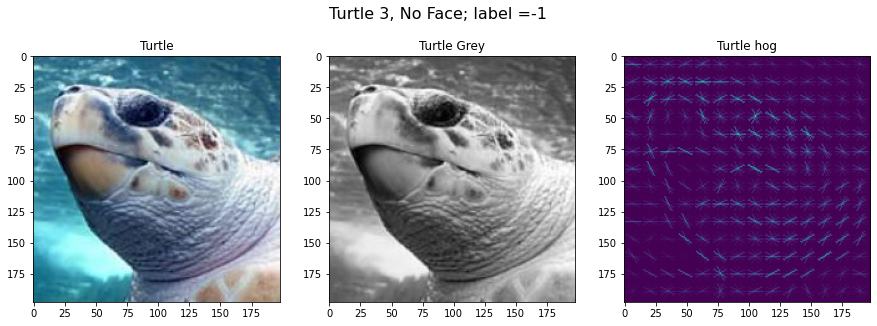

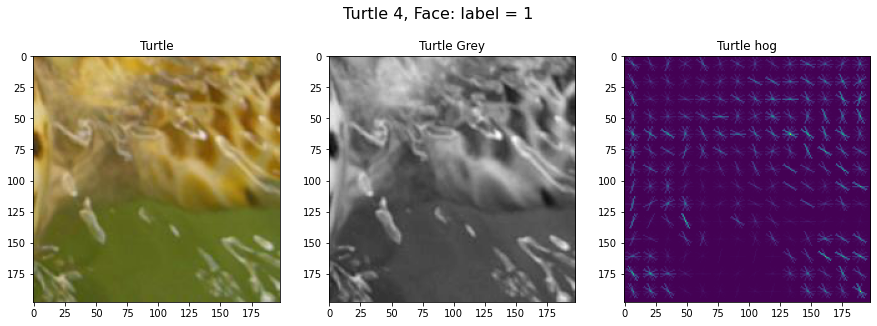

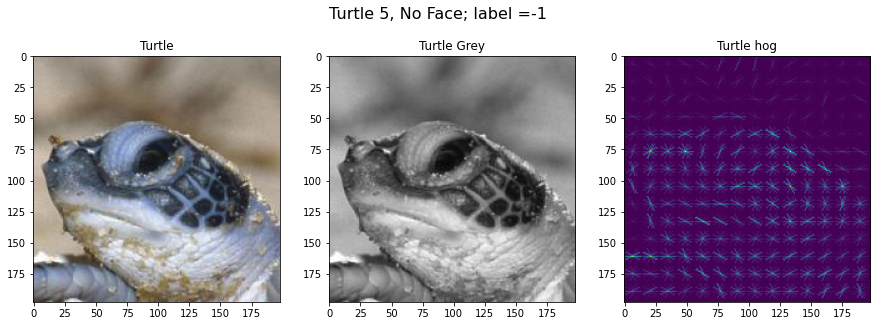

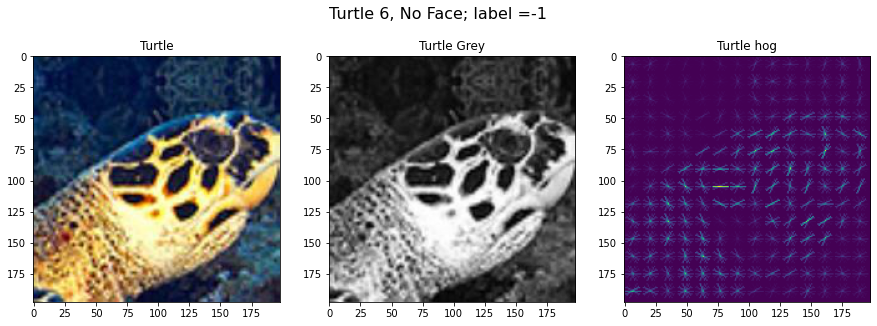

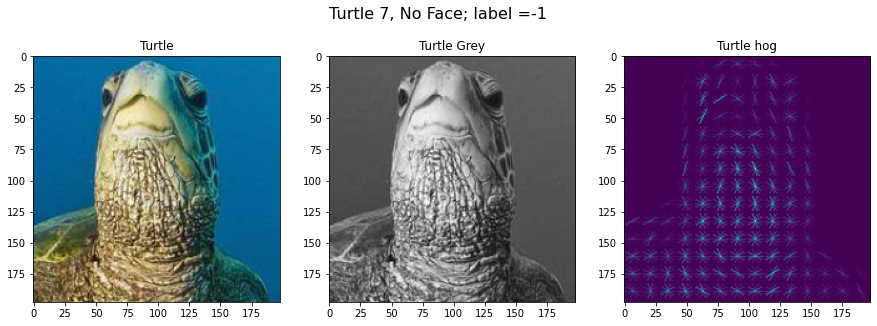

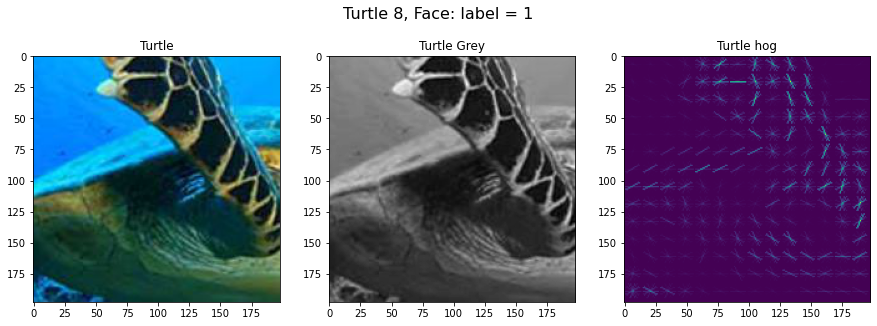

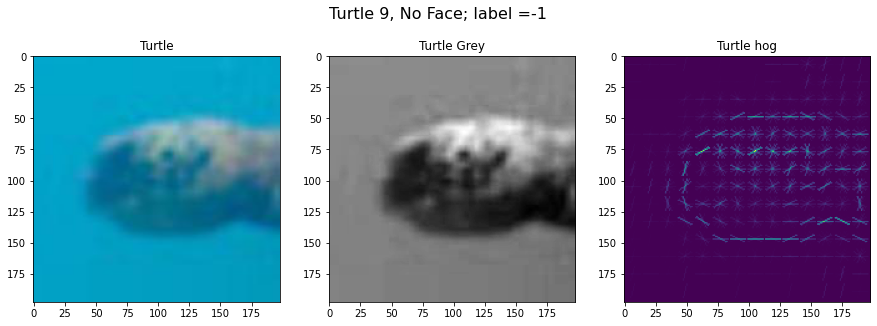

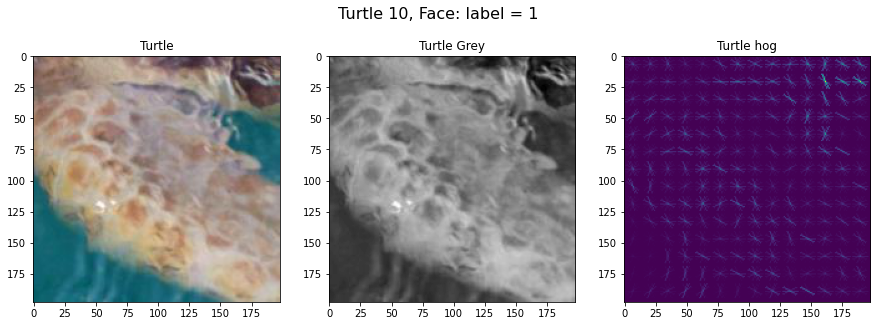

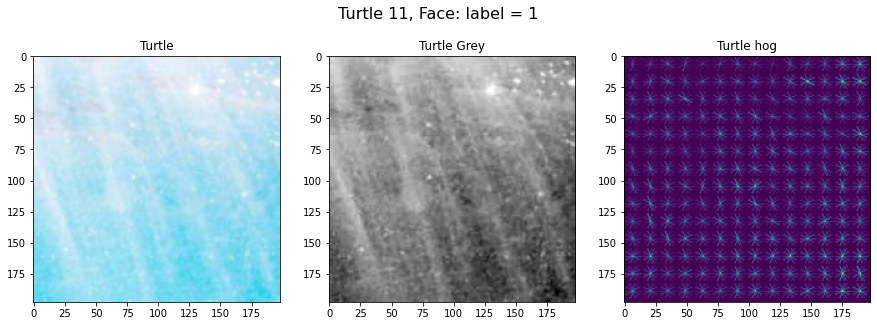

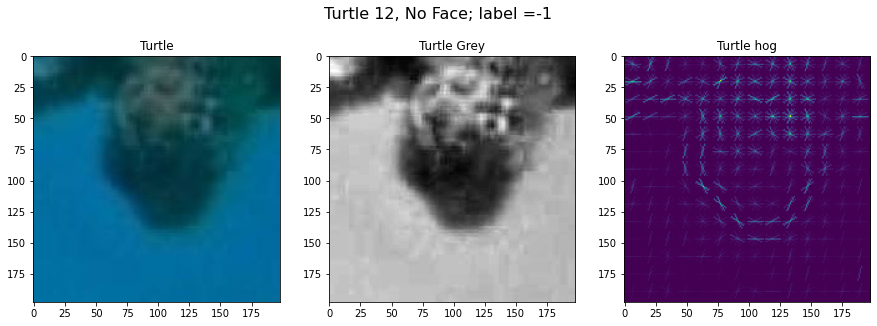

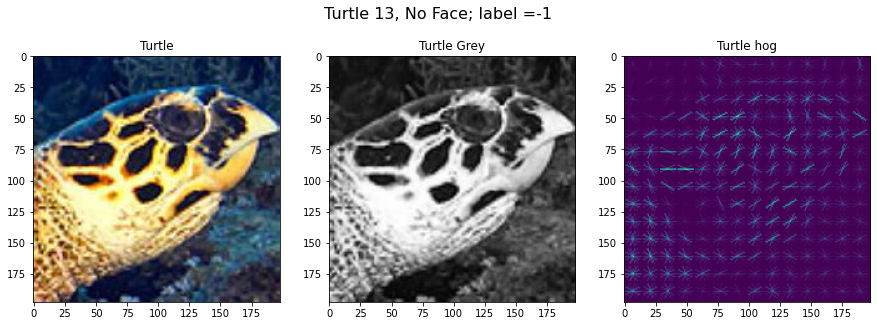

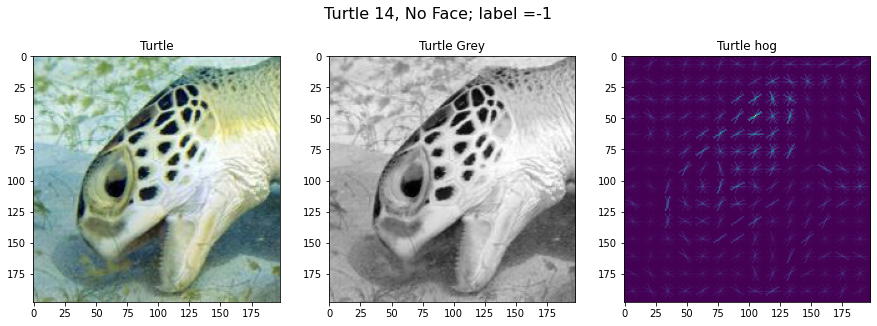

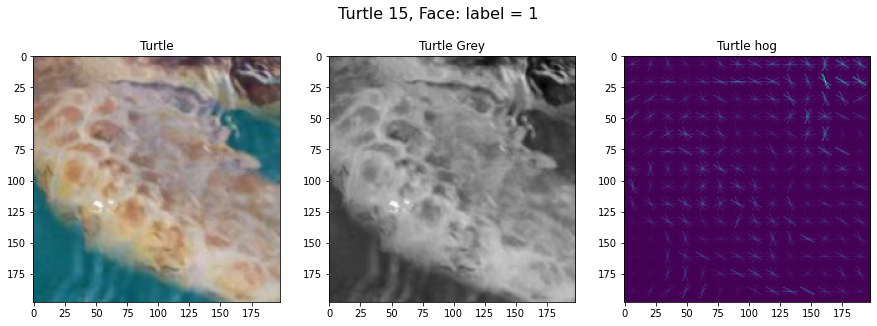

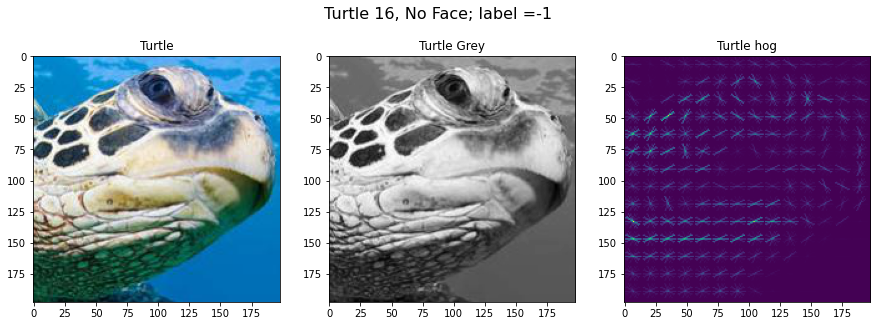

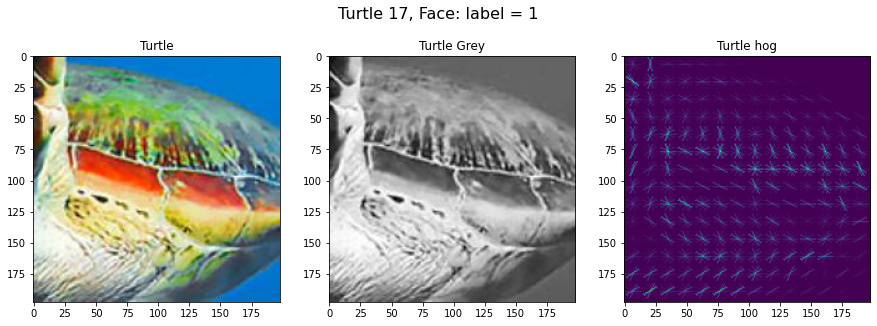

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [148]:
y_pred=clf.predict(X_test)
X_fails=X_test_raw[y_pred!=y_test]
y_fails=y_pred[y_pred!=y_test]

[plot_all_preprocessing(X_fails, y_fails, i) for i in range(0, len(X_fails))] 

<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>  
<a id="SVC"></a> 

## Sklearn: SVC dask (Currently not dask)

In [33]:
SVC_model = SVC(kernel='rbf', tol=0.001, gamma=0.0001, class_weight='balanced', C=100)

with joblib.parallel_backend('dask'):
    SVC_model.fit(X_train, y_train)

In [88]:
SVC_train_score = SVC_model.score(X_train,y_train)
SVC_test_score = SVC_model.score(X_test,y_test)
print ("Best SVC training accuracy: %f" % SVC_train_score)
print ("Best SVC test accuracy: %f" % SVC_test_score)

Best SVC training accuracy: 1.000000
Best SVC test accuracy: 0.995625


In [76]:
y_pred = SVC_model.predict(X_test)
fails=X_test[y_pred!=y_test]
fails

array([[-0.27792659, -0.5679682 ,  1.51138673, ...,  0.8377995 ,
         0.84847436,  1.01277626],
       [ 1.12118581, -0.44625991, -0.08157321, ...,  2.02719113,
         1.26765639,  0.39373655],
       [-1.45433081, -0.80322712, -0.96178526, ...,  1.49718345,
        -0.29748138, -0.94892783],
       [-0.39280102, -0.18861421, -0.73141948, ...,  1.22361009,
         0.36761088, -0.69014881]])

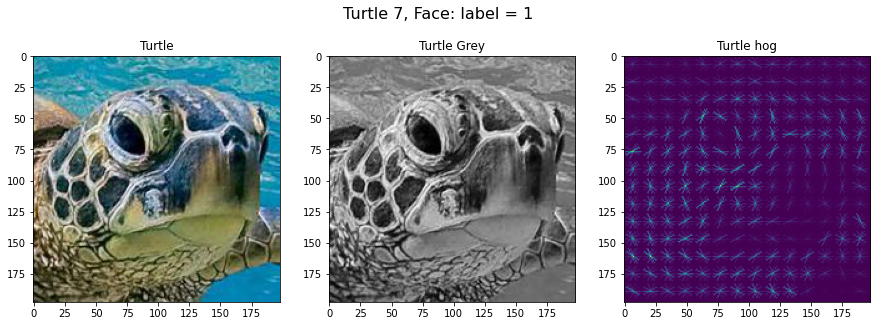

In [121]:
def plot_all_preprocessing(X, y, i): 
    #from skimage.feature import hog
    lb = ', No Face; label =-1'
    if y[i]==1:
        lb=', Face: label = 1'
    turtle = X[i]
    turtle_grey =  RGB2GrayTransformer().fit_transform(turtle)
    turtle_hog, turtle_hog_img = hog(
        turtle_grey, pixels_per_cell=(14,14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        visualize=True, 
        block_norm='L2-Hys')

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle('Turtle '+ str(i) +lb , fontsize=16)

    #[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) for a in ax]

    ax[0].imshow(turtle)
    ax[0].set_title('Turtle')
    ax[1].imshow(turtle_grey, cmap='gray')
    ax[1].set_title('Turtle')
    ax[1].imshow(turtle_grey, cmap='gray')
    ax[1].set_title('Turtle Grey')
    ax[2].imshow(turtle_hog_img)
    ax[2].set_title('Turtle hog')
    plt.show()

plot_all_preprocessing(X, y, 7)

## Preprocessing Performance with Chunksize Test

In [7]:
def chunk_test(funct, d_arr, chunk_sizes= [400,1000], n_iter=3, output_size = True, dtype=np.float64):
    if output_size: ##defult output and input the same
        output_size=da.shape(d_arr)
    
    from dask.distributed import wait
    import time
    chunk = da.shape(d_arr)
    means=np.zeros(len(chunk_sizes)); stds =means #just initalises same

    def run_n_time(funct, d_arr, chunk, output):
        t1 = time.perf_counter()
        d_arr = d_arr.rechunk(chunks= chunk).to_delayed().ravel()
        d_arr = da.concatenate([da.from_delayed(funct(i), output_size, dtype=dtype) for i in d_arr])
        wait(d_arr.persist())
        t2 = time.perf_counter()
        return t2-t1 
    i=0
    for size in chunk_sizes:
        output =(size, *output_size)
        chunk = (size, *chunk[1:])  
        times = np.array([run_n_time(funct, d_arr, chunk, output)  for n in range(0,n_iter)])
        means[i]  = np.mean(times) # np will convert
        stds[i]   = np.std(times)
        i+=1
        print('Chunk = ', i)
        
    means = means*1000
    stds = stds*1000
    return means, stds

chunk_sizes = [50,250, 500, 1000,2000]
n=3
times, std = chunk_test(SGD_preprocessing_d, X, chunk_sizes=chunck_sizes, n_iter=n, output_size=[6084])

Chunk =  1
Chunk =  2
Chunk =  3
Chunk =  4
Chunk =  5


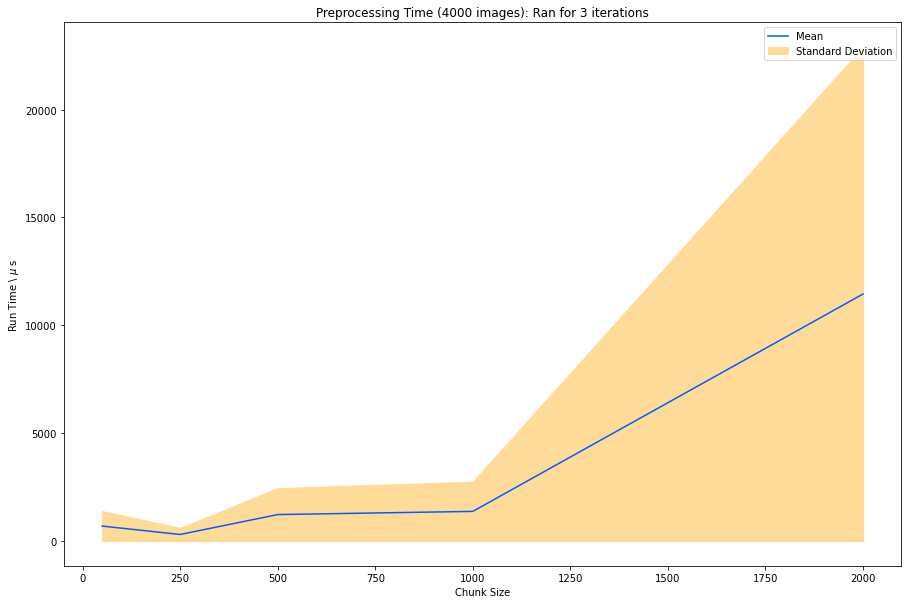

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
chunk_sizes=[50,250, 500, 1000,2000]
n=3
plt.plot(chunk_sizes, times, label = "Mean", color='#005AFF')
plt.fill_between(chunk_sizes,times+std,times-std, label='Standard Deviation', color='#ffdb99')
plt.xlabel('Chunk Size')
plt.ylabel('Run Time \ $\mu$ s')
plt.title('Preprocessing Time (4000 images): Ran for ' + str(n)+' iterations' )
plt.legend()

In [33]:
#client.restart()
import ctypes

def trim_memory() -> int:
    libc = ctypes.CDLL("libc.so.6")
    return libc.malloc_trim(0)

{'tcp://172.19.0.4:43613': 1,
 'tcp://172.19.0.5:41775': 1,
 'tcp://172.19.0.6:43247': 1,
 'tcp://172.19.0.7:32847': 1,
 'tcp://172.19.0.8:38339': 1,
 'tcp://172.19.0.9:33033': 1}